In [1]:
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

plt.style.use('science')

In [2]:
df = pd.read_csv("../data/lns-vs-saa.csv")

In [3]:
INSTANCE_COLUMNS = ["n", "idx", "distribution", "travel", "serv"]
df.groupby(INSTANCE_COLUMNS)['obj'].min()

n   idx  distribution  travel  serv
6   0    0             0       0        395.078
                               1        621.381
    1    0             0       0        492.744
                               1        509.041
    2    0             0       0        442.858
                                         ...   
15  17   0             0       1       1964.462
    18   0             0       0       1412.935
                               1       2378.459
    19   0             0       0       1373.183
                               1       2247.242
Name: obj, Length: 160, dtype: float64

In [4]:
df["time"]

0       16.873
1       15.740
2       16.015
3       15.906
4       15.774
         ...  
1435    16.170
1436    16.831
1437    16.785
1438    16.579
1439    16.478
Name: time, Length: 1440, dtype: float64

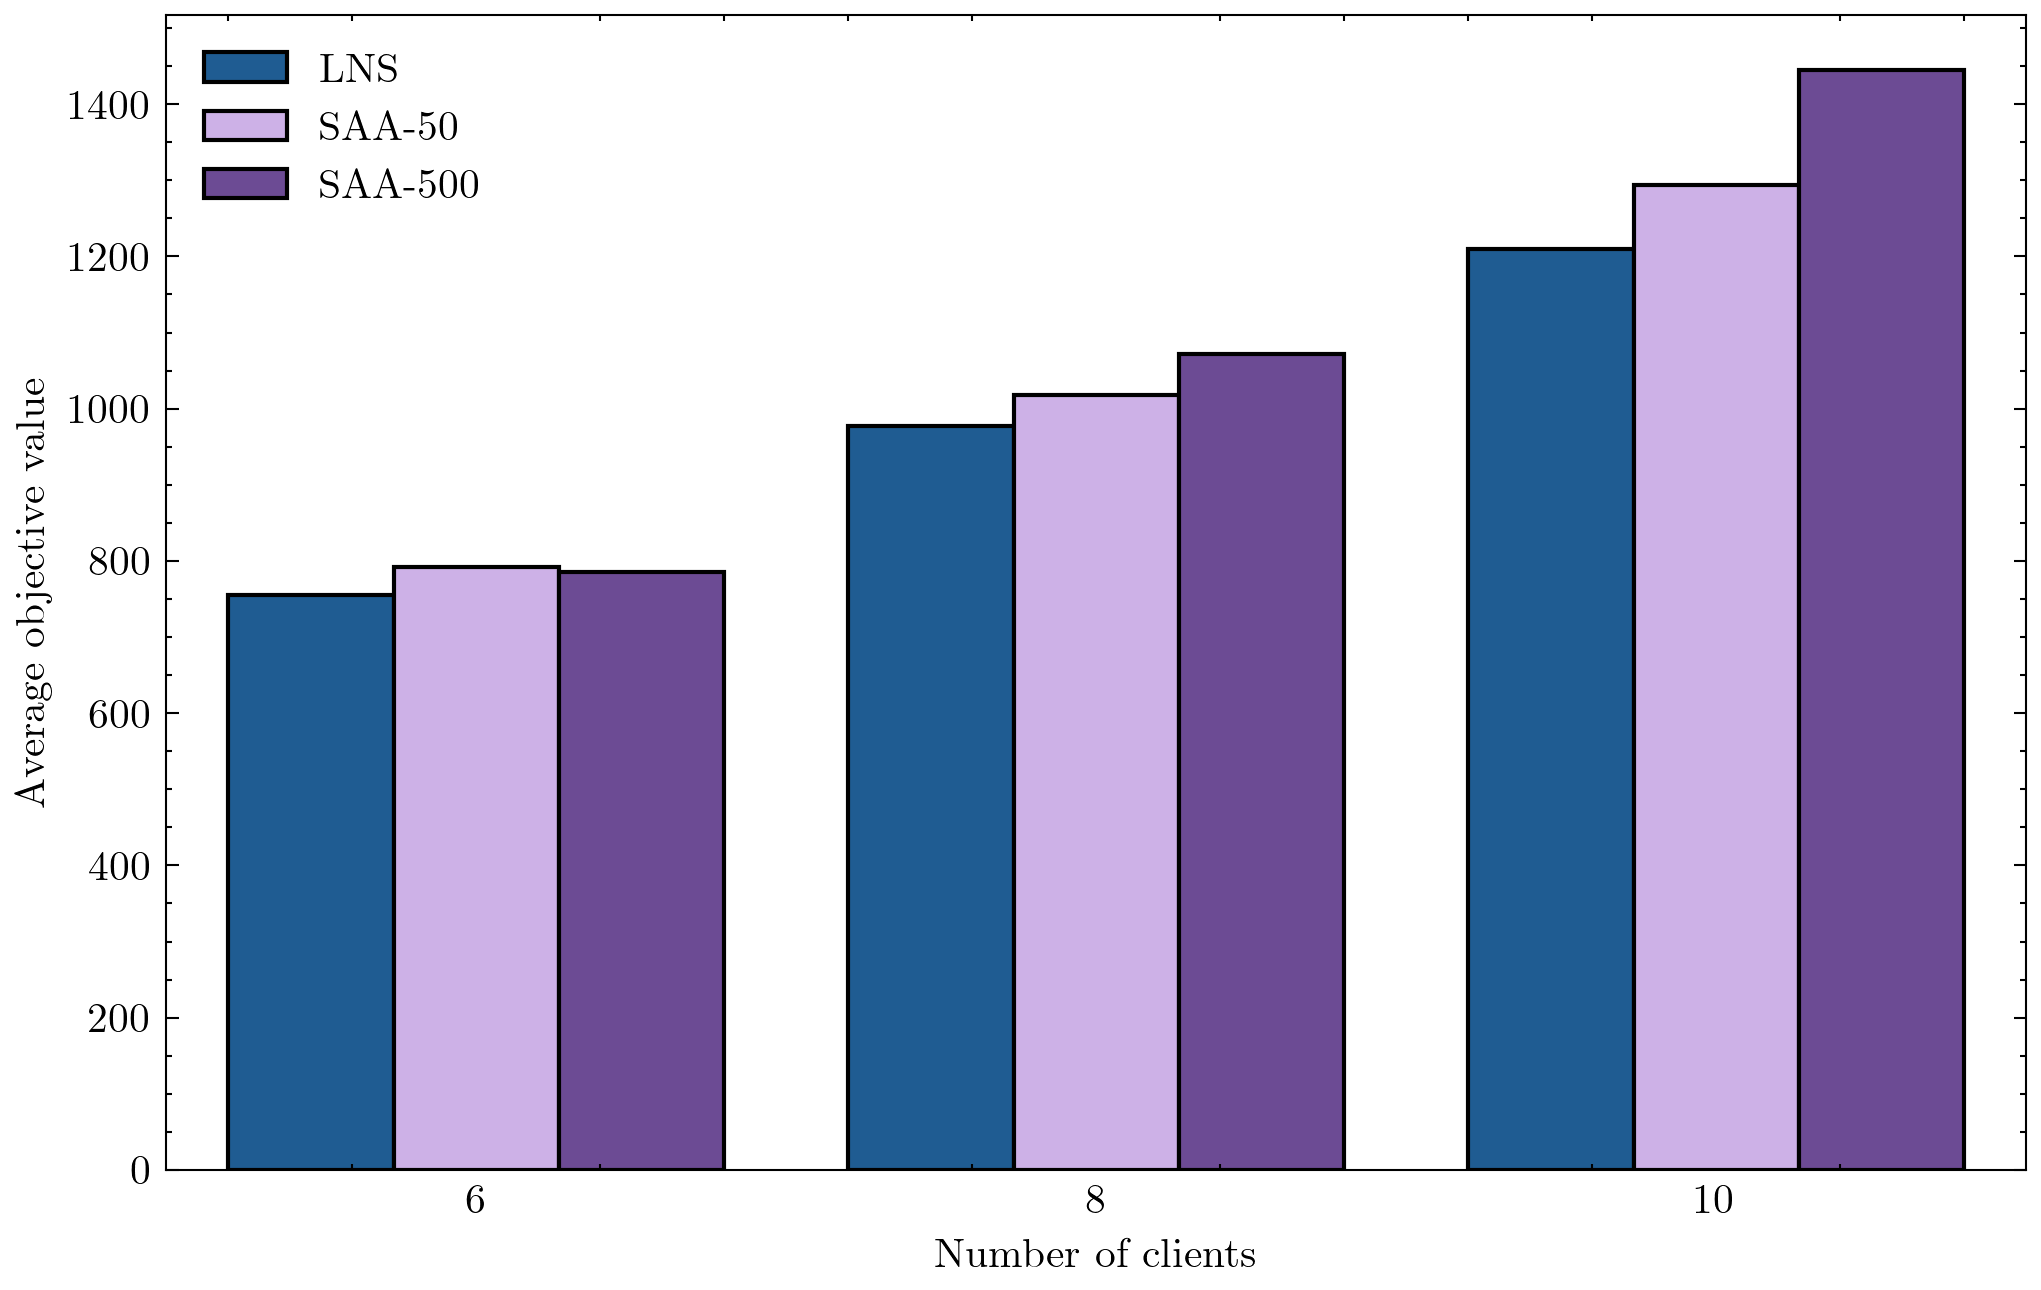

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df_ = df.groupby(["n", "alg"])['obj'].mean().reset_index()
df_ = df_[df_["n"] <= 10]
df_["alg"] = df_["alg"].map({"lns": "LNS", "tsang50": "SAA-50", "tsang500": "SAA-500"})

label_colors = {"LNS": "#0C5DA5", "SAA-50": "#CDA8F0", "SAA-500": "#6B3FA0"}

plt.figure(figsize=(8,5), dpi=300)
sns.barplot(
    x='n', 
    y='obj', 
    hue='alg', 
    data=df_, 
    palette=label_colors, 
    edgecolor='black', 
    linewidth=1
)

plt.legend()

plt.xlabel("Number of clients")
plt.ylabel("Average objective value")


ax = plt.gca()
ax.tick_params(axis='x', length=0)

plt.savefig('../figures/tsang.pdf')

In [6]:
df_

,n,alg,obj
0,6,LNS,755.278583
1,6,SAA-50,792.534083
2,6,SAA-500,784.901483
3,8,LNS,977.117133
4,8,SAA-50,1018.503642
5,8,SAA-500,1071.586933
6,10,LNS,1209.856458
7,10,SAA-50,1294.048692
8,10,SAA-500,1444.858858
